## Bollinger bands

In [1]:
# The code below increases the size of the output screen...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

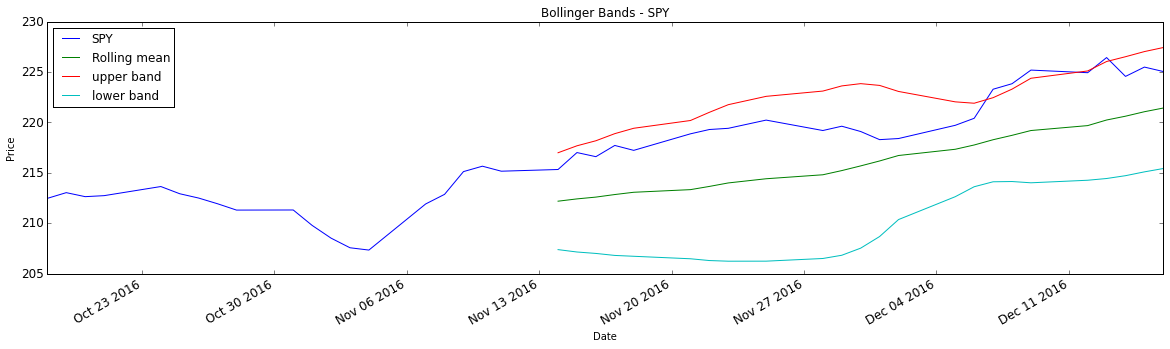

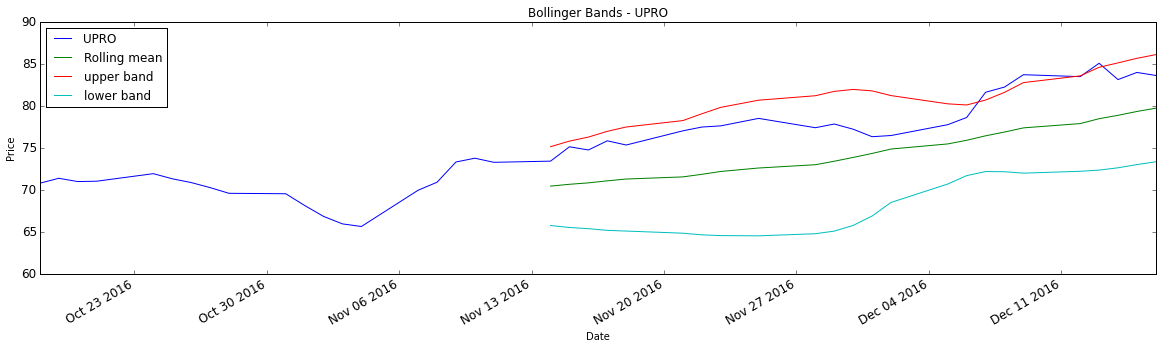

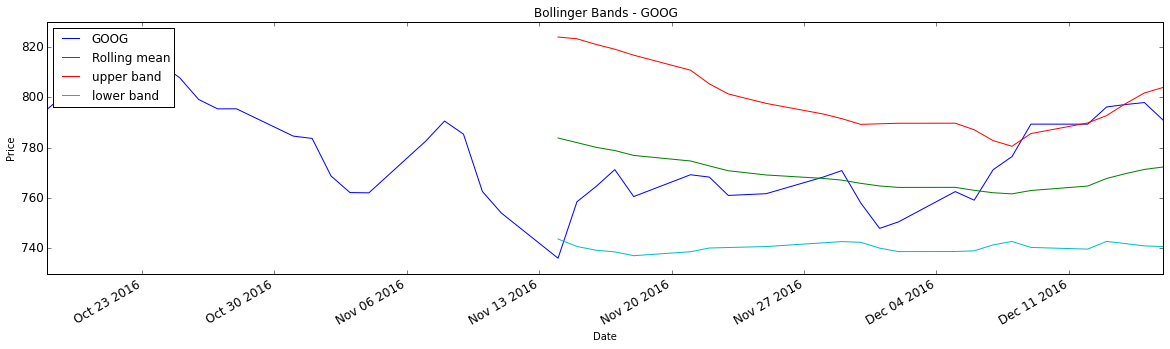

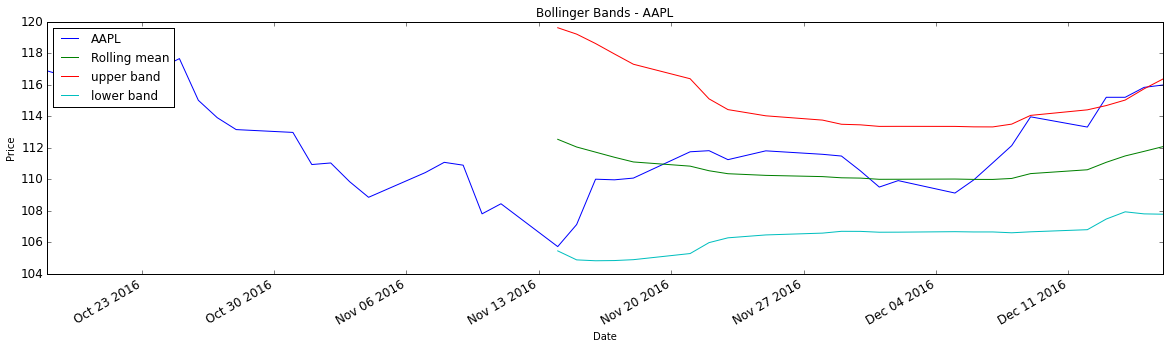

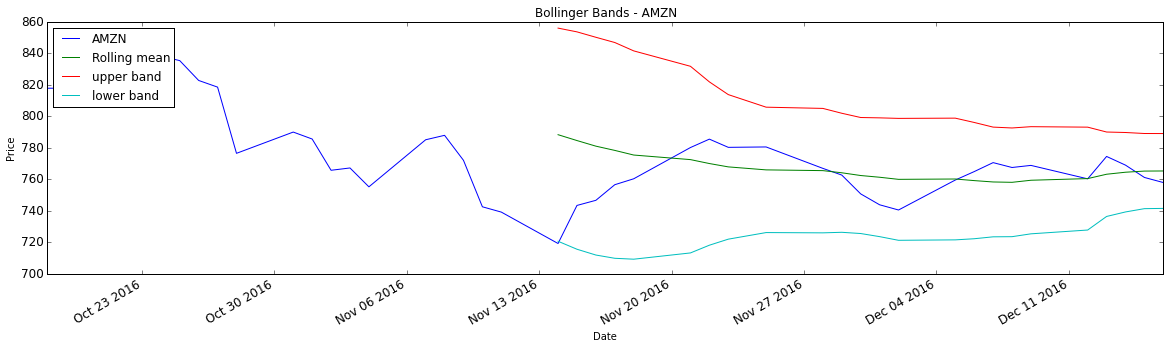

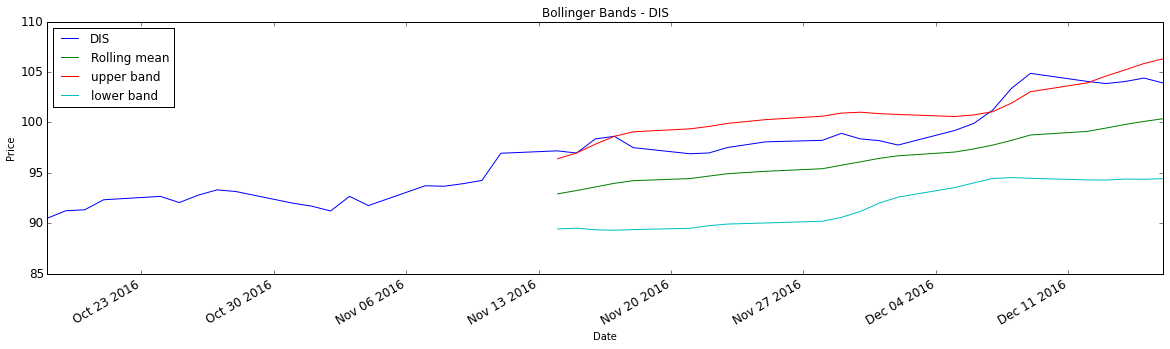

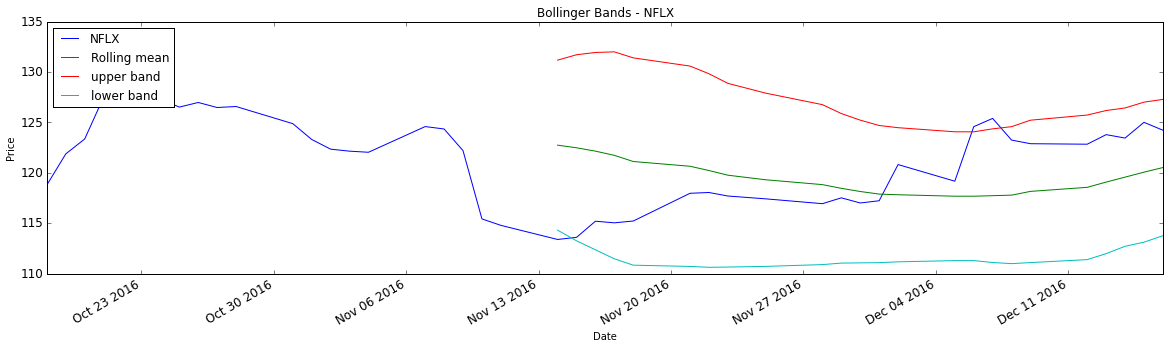

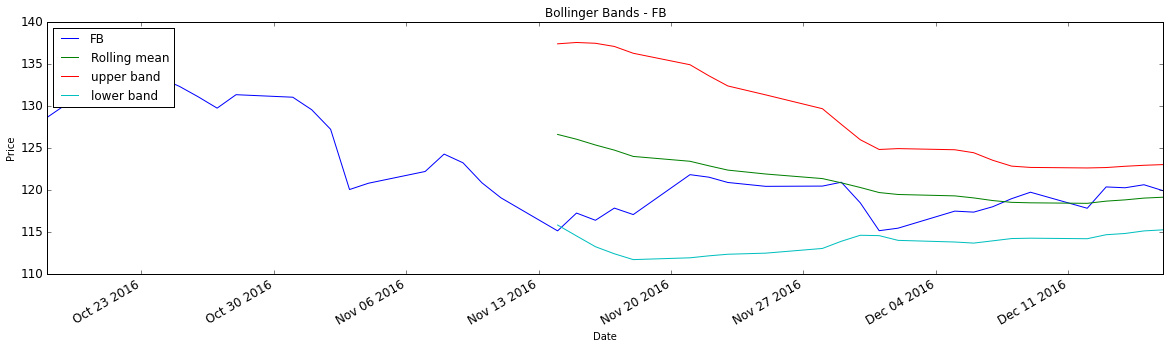

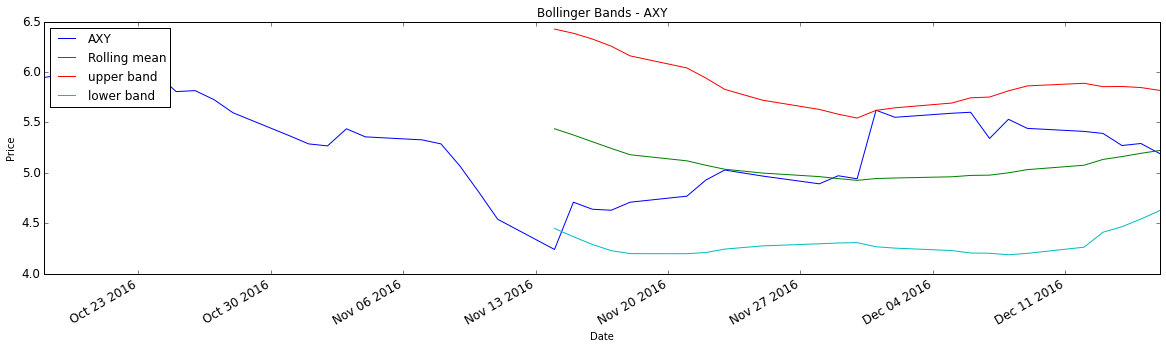

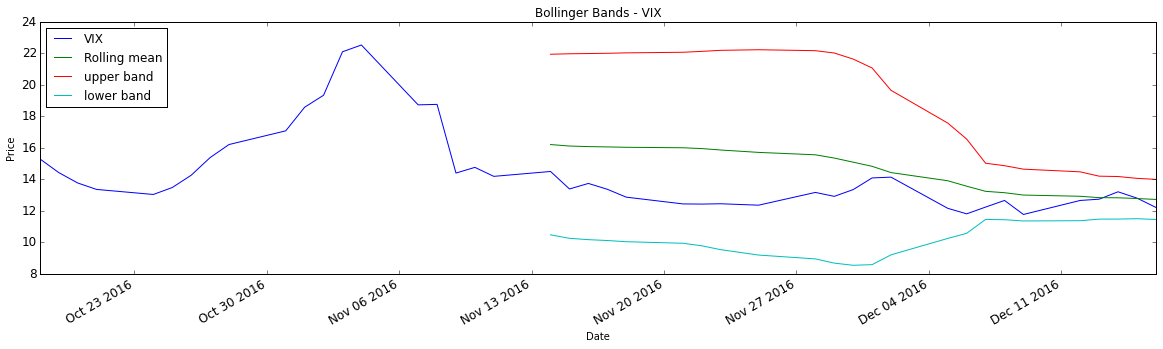

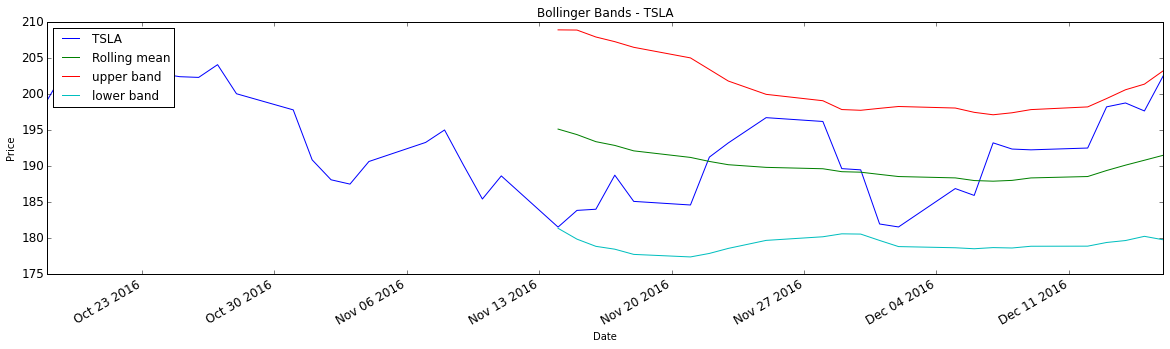

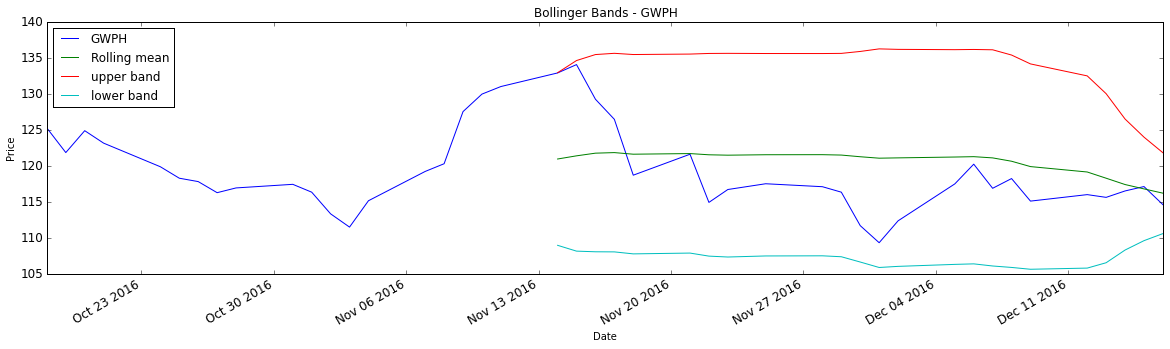

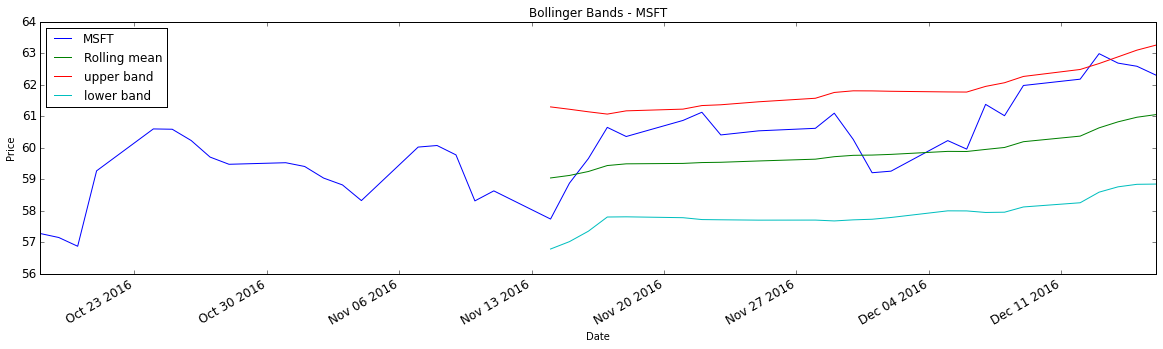

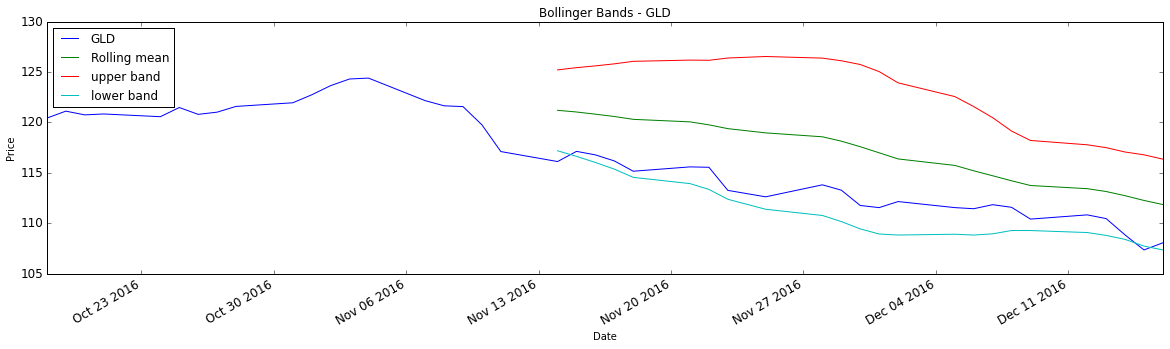

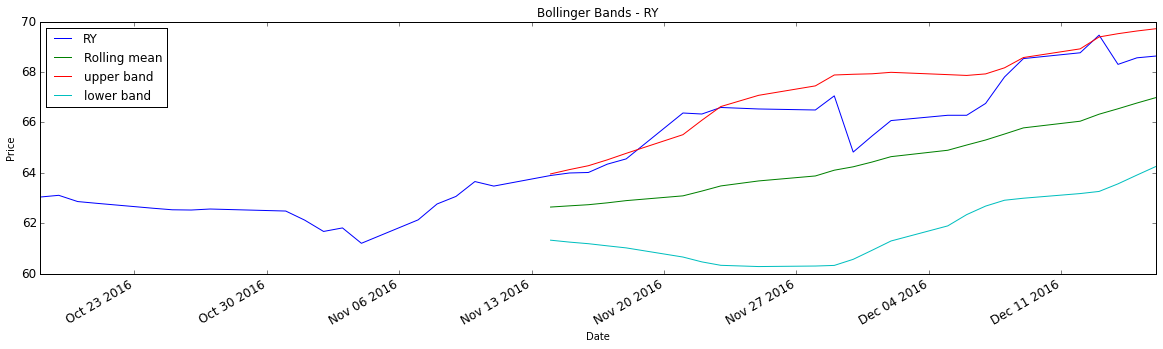

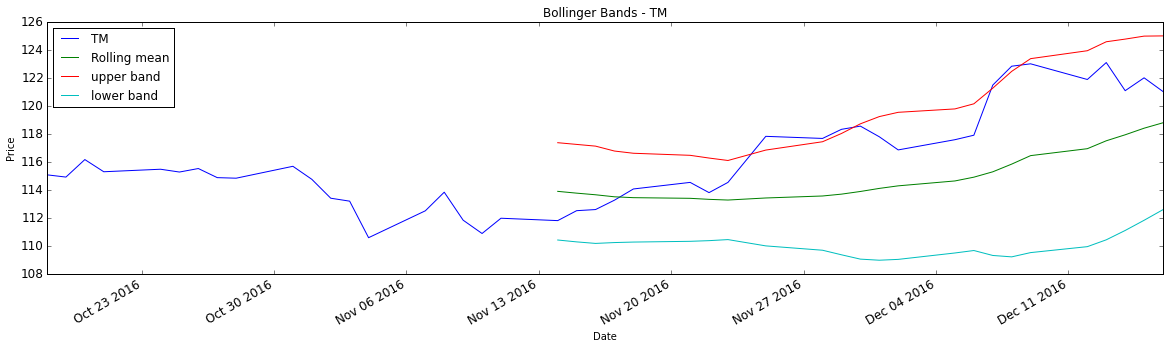

Bollinger bands - observations...


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_selected(df, columns, start_index, end_index):
    
    # plot_data(df.ix[start_index:end_index,columns], title="Selected data showing adjusted close price")
    
    for column in columns:
    
        # Compute Bollinger Bands
        # Compute rolling mean
        # rm_SPY = get_rolling_mean(df['SPY'], window=20)
        rm_SPY = get_rolling_mean(df[column], window=20)

        # Compute rolling standard deviation
        rstd_SPY = get_rolling_std(df[column], window=20)

        # Compute upper and lower bands
        upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
        # Plot raw SPY values, rolling mean and Bollinger Bands
        ax = df[column].plot(title="Bollinger Bands - " + column, label=column, fontsize=12,figsize=(20,5))
        rm_SPY.plot(label='Rolling mean', ax=ax)
        upper_band.plot(label='upper band', ax=ax)
        lower_band.plot(label='lower band', ax=ax)

        # Add axis labels and legend
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        ax.legend(loc='upper left')
        plt.show()

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    return pd.rolling_mean(values, window=window)


def get_rolling_std(values, window):
    return pd.rolling_std(values, window=window)


def get_bollinger_bands(rm, rstd):
    # Compute upper_band and lower_band
    upper_band = rm + rstd * 2
    lower_band = rm - rstd * 2
    return upper_band, lower_band


def add_bollinger_bands():
    # Read data
    dates = pd.date_range('2016-10-18', '2016-12-18')
    symbols = ['UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD','RY','TM']  
    # note:  SPY will be added in get_data()
    # new symbols -> RY (rbc), TM (Toyota)
    df = get_data(symbols, dates)
    
    plot_selected(df, ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD','RY','TM'], '2016-07-26', '2016-09-26')

    print "Bollinger bands - observations..."
    
if __name__ == "__main__":
    add_bollinger_bands()